## Preprocesamiento de datos Diplomacy

A continuación se presentan los analisis y prepraracion de los datos para realizar el entrenamiento de un modelo tipo *Transformer* con la arquitectura de BERT.

En este notebook se realiza el preprocesamiento de los datos recibiendo como entrada el dataset tomado de [Dataset Diplomacy Github](https://github.com/DenisPeskoff/2020_acl_diplomacy) el cual se guarda en una carpeta de one drive como jsonl y se transformara al formato necesario como se indica en [Tutorial entrenamiento de Bert Fine Tuning](https://www.tensorflow.org/tfmodels/nlp/fine_tune_bert)

El resultado de este notebook sera la version final del dataset listo para ser entrergado al notebook de entrenamiento.


In [ ]:
#Connecting to the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Current path
%cd /content/drive/Shareddrives/PRUEBAS_BANCOLOMBIA_SMITH/Prueba practica
!pwd

/content/drive/Shareddrives/PRUEBAS_BANCOLOMBIA_SMITH/Prueba practica
/content/drive/Shareddrives/PRUEBAS_BANCOLOMBIA_SMITH/Prueba practica


In [ ]:
!ls

 dataset		 ds_format_beto.zip   files		      requeriments.txt
 diplomacy_format_beto	 dyplomacy_bert      'Prueba Practica.docx'


In [ ]:
!pip install jsonlines

In [ ]:
path_test = r'./dataset/test.jsonl'
path_train = r'./dataset/train.jsonl'
path_val = r'./dataset/validation.jsonl'

In [ ]:
import jsonlines
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Cargamos los mismos sets de datos para test, train y validacion

def data_load(path):
  with jsonlines.open(path, 'r') as reader:
   list_reader = list(reader)
   list_messages = []
   list_label = []
   for sample in list_reader:
    list_messages.append(sample['messages'])
    list_label.append(sample['sender_labels'])

  dict_out = {'messages':list_messages, 'labels': list_label}
  df_out = pd.DataFrame(dict_out)
  df_out = df_out.explode(['messages','labels'],ignore_index=True)
  return df_out

test_raw = data_load(path_test)
train_raw = data_load(path_train)
val_raw = data_load(path_val)

In [ ]:
print("cantidad de datos de entrenamiento" ,train_raw.shape[0])
print("cantidad de datos de validacion" ,val_raw.shape[0])
print("cantidad de datos de test" ,test_raw.shape[0])

cantidad de datos de entrenamiento 13137
cantidad de datos de validacion 1417
cantidad de datos de test 2741


In [ ]:
na_train = train_raw[train_raw.isna().any(axis=1)]
na_val = val_raw[val_raw.isna().any(axis=1)]
na_test = test_raw[test_raw.isna().any(axis=1)]

print("cantidad de datos vacios de entrenamiento" ,na_train.shape[0])
print("cantidad de datos vacios de validacion" ,na_val.shape[0])
print("cantidad de datos vacios de test" ,na_test.shape[0])

print("Como la cantidad de datos nulos es poca podremos eliminarlos sin perder infromacion relevante ")

train_raw.dropna(inplace = True)
val_raw.dropna(inplace = True)
test_raw.dropna(inplace = True)

cantidad de datos vacios de entrenamiento 5
cantidad de datos vacios de validacion 1
cantidad de datos vacios de test 0
Como la cantidad de datos nulos es poca podremos eliminarlos sin perder infromacion relevante 


In [ ]:
# Dado que algunos textos tienen longitud menor a 10 caracteres, no aportaran informacion suficiente al modelo
train_raw = train_raw[train_raw['messages'].str.len()>=10]
val_raw = val_raw[val_raw['messages'].str.len()>=10]

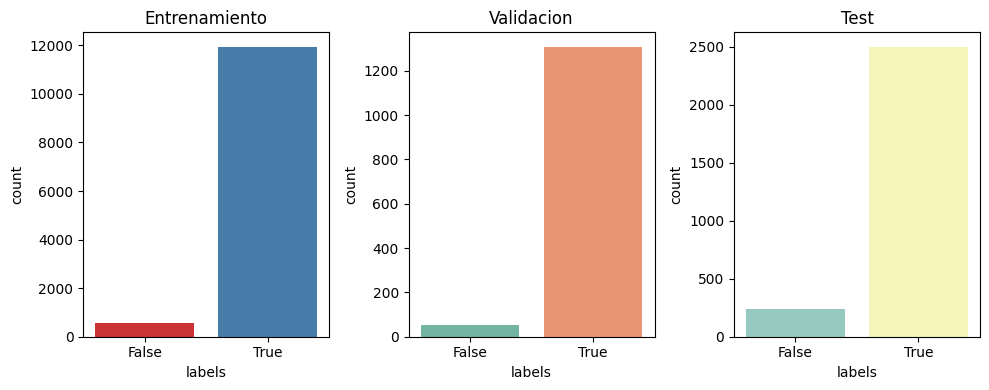

In [ ]:
# Veamos la distribucion por clases

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

sns.countplot(x='labels', data=train_raw, ax= axes [0] ,palette='Set1')
sns.countplot(x='labels', data=val_raw, ax= axes [1] ,palette='Set2')
sns.countplot(x='labels', data=test_raw, ax= axes [2] ,palette='Set3')

axes[0].set_title("Entrenamiento")
axes[1].set_title("Validacion")
axes[2].set_title("Test")

plt.tight_layout()
plt.show()

In [ ]:
path_train_true = r'./dataset/ds_format_beto/train/True/'
path_train_false = r'./dataset/ds_format_beto/train/False/'

path_val_true = r'./dataset/ds_format_beto/validation/True/'
path_val_false = r'./dataset/ds_format_beto/validation/False/'

path_test_true = r'./dataset/ds_format_beto/test/True/'
path_test_false = r'./dataset/ds_format_beto/test/False/'

In [ ]:
train_raw['messages'][0]

'Germany!\n\nJust the person I want to speak with. I have a somewhat crazy idea that I’ve always wanted to try with I/G, but I’ve never actually convinced the other guy to try it. And, what’s worse, it might make you suspicious of me. \n\nSo...do I suggest it?\n\nI’m thinking that this is a low stakes game, not a tournament or anything, and an interesting and unusual move set might make it more fun? That’s my hope anyway.\n\nWhat is your appetite like for unusual and crazy?'

In [ ]:
def creator_text(data_frame,path):
  for sample in data_frame.index:
    index = sample
    with open(path + 'text_' + str(index) + '.txt', 'w') as f:
        f.write(data_frame['messages'][index])

  return print("Create all samples on " , path)

### Generamos los respectivos archivos encargados para los datos de train, test y validacion

In [ ]:
creator_text(test_raw[test_raw['labels']==True],path_test_true)

Create all samples on  ./dataset/ds_format_beto/test/True/


In [ ]:
creator_text(test_raw[test_raw['labels']==False],path_test_false)

Create all samples on  ./dataset/ds_format_beto/test/False/


In [ ]:
creator_text(train_raw[train_raw['labels']==True],path_train_true)

Create all samples on  ./dataset/ds_format_beto/train/True/


In [ ]:
creator_text(train_raw[train_raw['labels']==False],path_train_false)

Create all samples on  ./dataset/ds_format_beto/train/False/


In [ ]:
creator_text(val_raw[val_raw['labels']==True],path_val_true)

Create all samples on  ./dataset/ds_format_beto/validation/True/


In [ ]:
creator_text(val_raw[val_raw['labels']==False],path_val_false)

Create all samples on  ./dataset/ds_format_beto/validation/False/


In [ ]:
#!zip -r test.zip ./dataset/ds_format_beto/test

In [ ]:
#!unzip ./diplomacy_format_beto/test.zip